In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df= pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Different type of the analysis

####  Univariate

Lets take a small data set out of the original one we will use Geography, Gender, Exited columns for this

In [7]:
df_new=df[['Geography','Gender','Exited']]

In [8]:
df_new

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0
...,...,...,...
9995,France,Male,0
9996,France,Male,0
9997,France,Female,1
9998,Germany,Male,1


In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Geography  10000 non-null  object
 1   Gender     10000 non-null  object
 2   Exited     10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


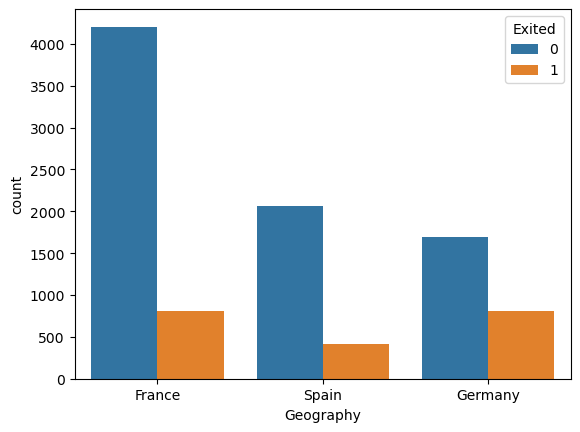

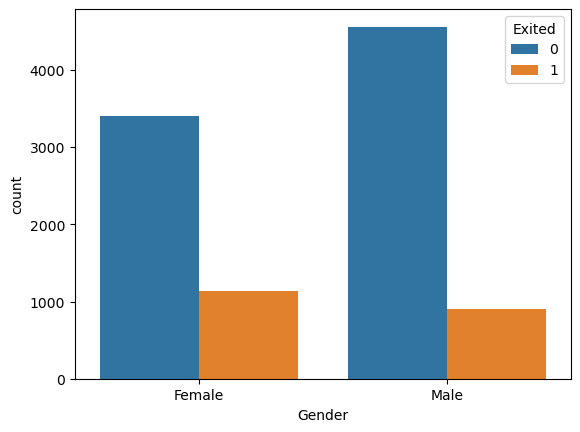

In [14]:
for i, predictor in enumerate(df_new.drop(columns=['Exited'])):
    plt.figure(i)
    sns.countplot(data=df_new,x=predictor, hue='Exited')

### Bivariate Analysis

<Axes: xlabel='Gender', ylabel='Count'>

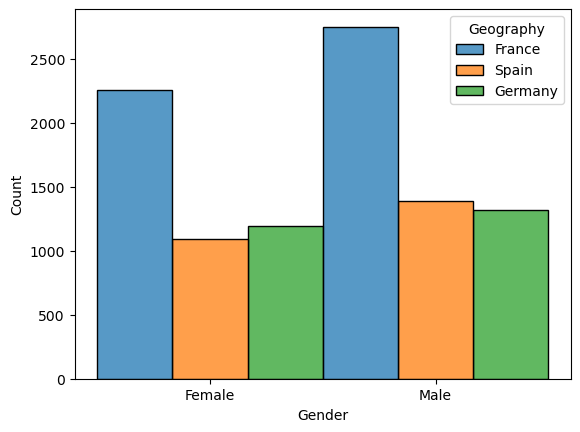

In [16]:
# will use histplot for this
sns.histplot(x='Gender' ,hue='Geography',data=df_new, stat="count", multiple="dodge")

                                          original data

In [19]:
df_churn= df_new.loc[df_new["Exited"]==1]

In [20]:
df_churn

,Geography,Gender,Exited
0,France,Female,1
2,France,Female,1
5,Spain,Male,1
7,Germany,Female,1
16,Germany,Male,1
...,...,...,...
9981,Germany,Male,1
9982,Germany,Female,1
9991,France,Female,1
9997,France,Female,1


<Axes: xlabel='Gender', ylabel='Count'>

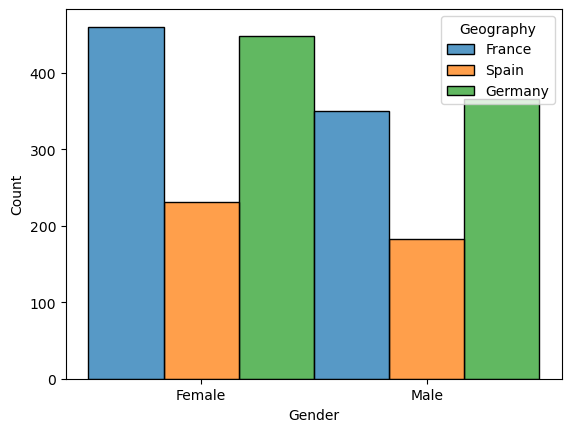

In [25]:
sns.histplot(x="Gender", hue='Geography', stat= "count", data=df_churn,multiple= "dodge")

by observing this we can say that females are more churner then main in each of this three countries

### Numarical Analysis

We used to perform correlation analysis

Correlation: It ranges form -1 to +1

- +1 --> Postive correlation
- -1 --> Negative correlation
- ~0 --> No correlation

 ![](Correl.png) 

In [32]:
#corr() function is used to find the correlation

df_numeric = df.drop(columns=df.select_dtypes(['object', 'category']).columns)
corr = df_numeric.corr()


In [34]:
corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

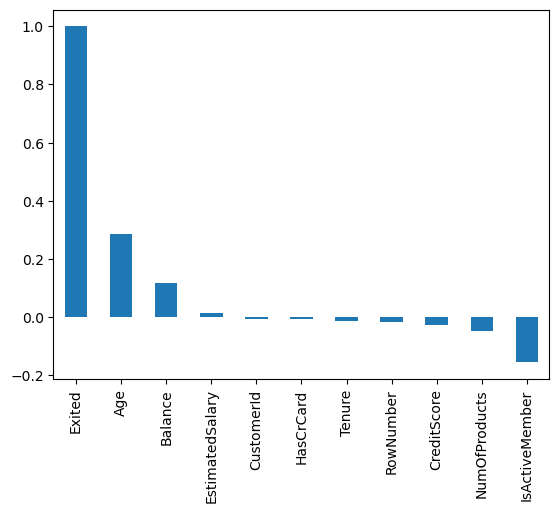

In [35]:
plt.figure()
corr['Exited'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

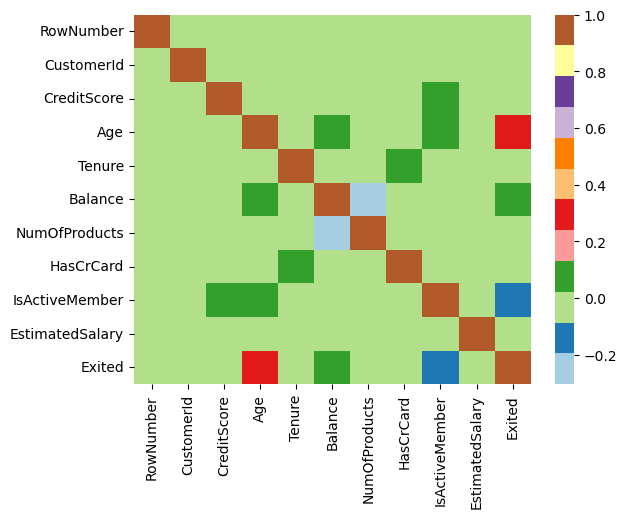

In [40]:
plt.figure()
sns.heatmap(data=corr, cmap="Paired")

<Axes: xlabel='Age'>

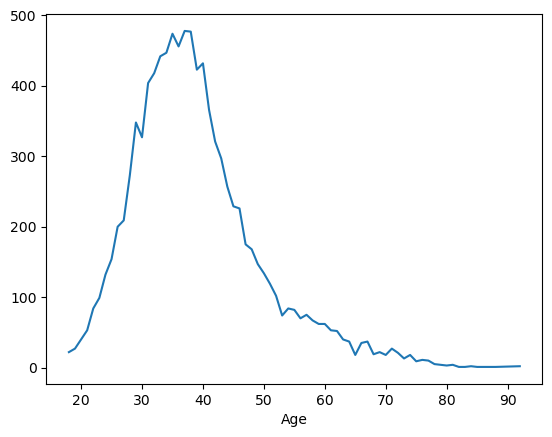

In [42]:
#ploting age using a line chart
df['Age'].value_counts().sort_index(ascending=True).plot() #by default it will plot a line map plot()

In [50]:
df_churn2=df.loc[df['Exited']==1]

<Axes: xlabel='Age'>

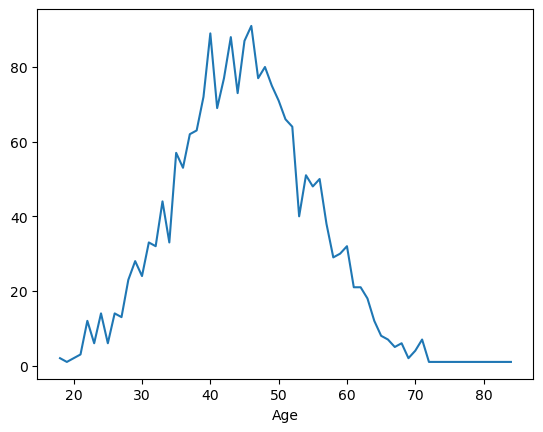

In [55]:
#for the churn customer
df_churn2["Age"].value_counts().sort_index(ascending=True).plot()

C:\Users\bhaka\AppData\Local\Temp\ipykernel_720\1203289436.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.Age[(df["Exited"]==0)],
C:\Users\bhaka\AppData\Local\Temp\ipykernel_720\1203289436.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.Age[(df["Exited"]==1)],


Text(0.5, 1.0, 'Age by churn')

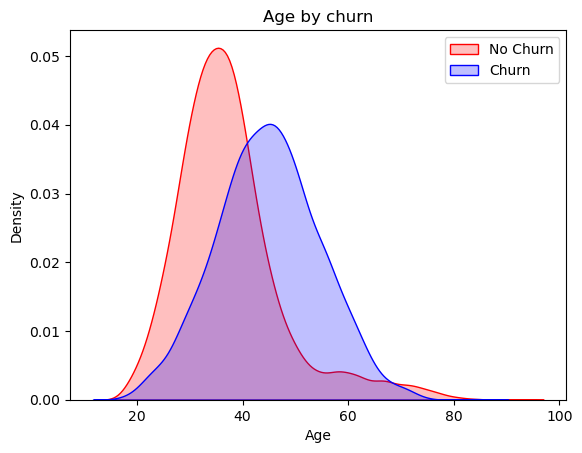

In [57]:

Tot = sns.kdeplot(df.Age[(df["Exited"]==0)],
                  color="Red", shade=True)
Tot = sns.kdeplot(df.Age[(df["Exited"]==1)],
                  color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Age')
Tot.set_title('Age by churn')

this also shows that age is an imp factor

C:\Users\bhaka\AppData\Local\Temp\ipykernel_720\1739934547.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.Tenure[(df["Exited"]==0)],
C:\Users\bhaka\AppData\Local\Temp\ipykernel_720\1739934547.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.Tenure[(df["Exited"]==1)],


Text(0.5, 1.0, 'Tenure by churn')

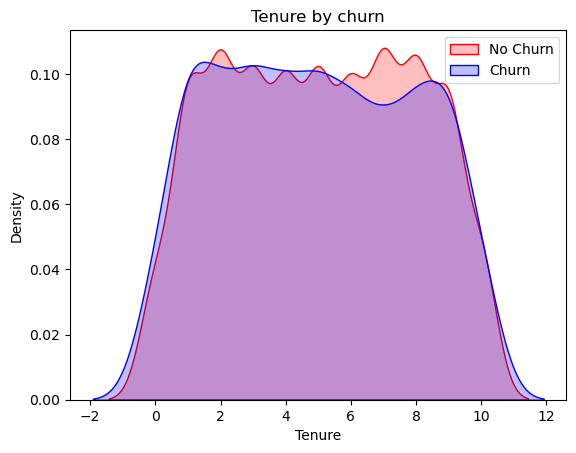

In [59]:

Tot = sns.kdeplot(df.Tenure[(df["Exited"]==0)],
                  color="Red", shade=True)
Tot = sns.kdeplot(df.Tenure[(df["Exited"]==1)],
                  color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Tenure')
Tot.set_title('Tenure by churn')

C:\Users\bhaka\AppData\Local\Temp\ipykernel_720\702535403.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.Balance[(df["Exited"]==0)],
C:\Users\bhaka\AppData\Local\Temp\ipykernel_720\702535403.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.Balance[(df["Exited"]==1)],


Text(0.5, 1.0, 'Balance by churn')

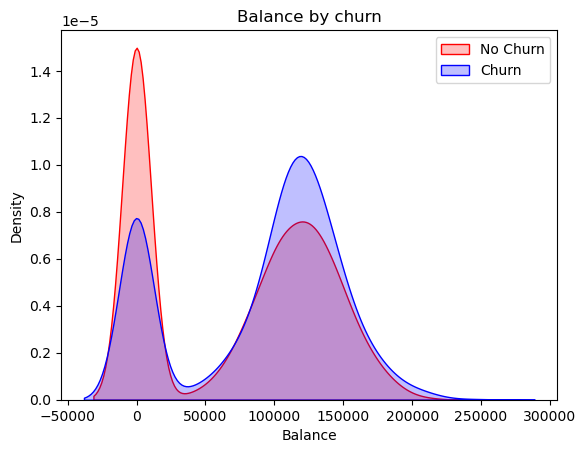

In [60]:
Tot = sns.kdeplot(df.Balance[(df["Exited"]==0)],
                  color="Red", shade=True)
Tot = sns.kdeplot(df.Balance[(df["Exited"]==1)],
                  color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Balance')
Tot.set_title('Balance by churn')